<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

In [17]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, Normalizer

from tensorflow.keras.datasets import boston_housing

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 

In [18]:
dataload = boston_housing.load_data(
    test_split=0.2,
    seed=734
)

(X_train, y_train), (X_test, y_test) = dataload

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


### Data Columns Description:

 - CRIM: per capita crime rate by town.
 - ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
 - INDUS: proportion of non-retail business acres per town. 
 - CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). 
 - NOX: nitric oxides concentration (parts per 10 million). 
 - RM: average number of rooms per dwelling. 
 - AGE: proportion of owner-occupied units built prior to 1940. 
 - DIS: weighted distances to ﬁve Boston employment centers. 
 - RAD: index of accessibility to radial highways. 
 - TAX: full-value property-tax rate per 10,000 dollars. 
 - PTRATIO: pupil-teacher ratio by town. 
 - B: 1000(Bk−0.63)^2 where Bk is the proportion of blacks by town. 
 - LSTAT: Percent lower status of the population. 
 - MEDV: Median value of owner-occupied homes in thousand dollars.

-----
- Normalize the data (all features should have roughly the same scale)

In [39]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
scaled_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002685,0.000000,0.346041,0.0,0.321577,0.425560,0.708548,0.263902,0.130435,0.223282,0.617021,1.000000,0.392108
1,0.008951,0.000000,0.281525,0.0,0.309129,0.363096,0.347065,0.242514,0.130435,0.229008,0.893617,0.726325,0.274834
2,0.089763,0.000000,0.646628,0.0,0.645228,0.375359,1.000000,0.036692,1.000000,0.914122,0.808511,1.000000,0.629967
3,0.001142,0.000000,0.296921,0.0,0.271784,0.504694,0.530381,0.149879,0.173913,0.375954,0.882979,0.991352,0.310982
4,0.000853,0.231579,0.197947,0.0,0.087137,0.650699,0.040165,0.707208,0.260870,0.272901,0.691489,0.972584,0.049669


In [61]:
scaled_test_df = pd.DataFrame(scaler.transform(X_test), columns=cols)
scaled_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.026552,0.000000,0.700880,0.0,1.000000,0.261544,0.955716,0.030118,0.173913,0.412214,0.223404,0.986837,0.767108
1,0.002892,0.000000,0.296921,0.0,0.271784,0.511209,0.909372,0.128718,0.173913,0.375954,0.882979,0.985620,0.381347
2,0.001053,0.357895,0.206378,0.0,0.091286,0.655490,0.152420,0.396666,0.260870,0.270992,0.372340,0.983591,0.086369
3,0.004448,0.000000,0.346041,0.0,0.321577,0.540525,0.662204,0.218507,0.130435,0.223282,0.617021,0.995714,0.238135
4,0.000531,0.221053,0.189883,0.0,0.103734,0.565242,0.187436,0.516973,0.130435,0.106870,0.446809,1.000000,0.097958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.000323,0.842105,0.164589,0.0,0.045643,0.632305,0.257467,0.362566,0.130435,0.110687,0.702128,1.000000,0.044150
98,0.278694,0.000000,0.646628,0.0,0.630705,0.342594,0.958805,0.052124,1.000000,0.914122,0.808511,1.000000,0.497792
99,0.000903,0.473684,0.109238,0.0,0.099585,0.693045,0.240989,0.486519,0.173913,0.402672,0.276596,0.983743,0.031457
100,0.114945,0.000000,0.646628,0.0,0.466805,0.502778,0.966014,0.094654,1.000000,0.914122,0.808511,0.956378,0.449779


-----
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D
from tensorflow.keras.metrics import mae


bh_model = Sequential(name='sandboxModeling')

bh_model.add(Dense(13, input_dim=13, activation='relu', name='Dense1'))
bh_model.add(Dense(8, activation='tanh', name='Dense2'))
# bh_model.add(Dense(8, activation='tanh', name='Dense3'))
bh_model.add(Dense(1, activation='relu', name='Dense4'))

bh_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

bh_model.summary()

Model: "sandboxModeling"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense1 (Dense)               (None, 13)                182       
_________________________________________________________________
Dense2 (Dense)               (None, 8)                 112       
_________________________________________________________________
Dense4 (Dense)               (None, 1)                 9         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [76]:
bh_model.fit(X_train, y_train, epochs=500)

======================] - 0s 64us/sample - loss: 586.4878 - mae: 22.4366
Epoch 812/1000
404/404 [==============================] - 0s 72us/sample - loss: 586.4878 - mae: 22.4366
Epoch 813/1000
404/404 [==============================] - 0s 67us/sample - loss: 586.4878 - mae: 22.4366
Epoch 814/1000
404/404 [==============================] - 0s 59us/sample - loss: 586.4878 - mae: 22.4366
Epoch 815/1000
404/404 [==============================] - 0s 64us/sample - loss: 586.4878 - mae: 22.4366
Epoch 816/1000
404/404 [==============================] - 0s 74us/sample - loss: 586.4878 - mae: 22.4366
Epoch 817/1000
404/404 [==============================] - 0s 67us/sample - loss: 586.4878 - mae: 22.4366
Epoch 818/1000
404/404 [==============================] - 0s 74us/sample - loss: 586.4878 - mae: 22.4366
Epoch 819/1000
404/404 [==============================] - 0s 62us/sample - loss: 586.4878 - mae: 22.4366
Epoch 820/1000
404/404 [==============================] - 0s 64us/sample - loss: 586.48

In [77]:
bh_model.evaluate(X_train, y_train)

404/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[586.4878135152383, 22.436634]

In [69]:
bh_model.evaluate(X_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[569.7349093568091, 21.91375]

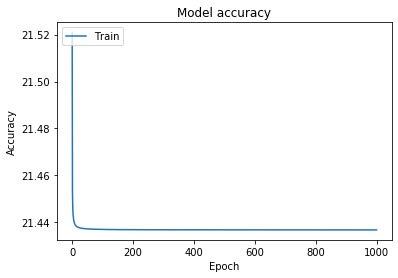

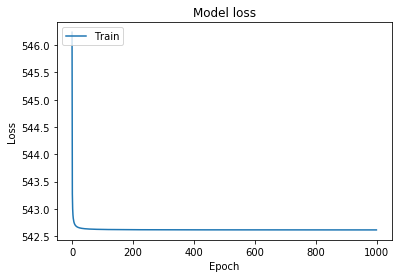

In [71]:
import matplotlib.pyplot as plt

histplot = bh_model.history

# Plot training & validation accuracy values
plt.plot(histplot.history['mae'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(histplot.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.